# import libraries

In [1]:
# data manipulation 
import numpy as np
import pandas as pd

# plotting
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import plotly. express as px
import folium

# setting params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

sn.set_style('whitegrid')
sn.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600

# pandas display data frames as tables
from IPython.display import display, HTML


# load dataset

In [2]:
# m1 df = pd.read_csv('/Users/ingluissantana/Desktop/Py/PP1_bike_sharing_MVG/MVG_Rad_Fahrten_2021.csv', delimiter= ';')
# 5k
df_2021 = pd.read_csv('/Users/luis/Desktop/Py/other_data/MVG_Rad_Fahrten_2021.csv', delimiter= ';', low_memory=False, dtype=str)
df_2020 = pd.read_csv('/Users/luis/Desktop/Py/other_data/MVG_Rad_Fahrten_2020.csv', delimiter= ';', low_memory=False, dtype=str)
df_2019 = pd.read_csv('/Users/luis/Desktop/Py/other_data/MVG_Rad_Fahrten_2019.csv', delimiter= ';', low_memory=False, dtype=str)
df_2018 = pd.read_csv('/Users/luis/Desktop/Py/other_data/MVG_Rad_Fahrten_2018.csv', delimiter= ';', low_memory=False, dtype=str)
df_2017 = pd.read_csv('/Users/luis/Desktop/Py/other_data/MVG_Rad_Fahrten_2017.csv', delimiter= ';', low_memory=False, dtype=str)
df_2016 = pd.read_csv('/Users/luis/Desktop/Py/other_data/MVG_Rad_Fahrten_2016.csv', delimiter= ';', low_memory=False, dtype=str)
df_2015 = pd.read_csv('/Users/luis/Desktop/Py/other_data/MVG_Rad_Fahrten_2015.csv', delimiter= ';', low_memory=False, dtype=str)


# quality and cleaning of the data

In [3]:
#to make the data more readable i will change everything to lowercase and use a _ instead of a space and change the date format
def clean_df(df):

    #format_columns
    df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

    #row_column
    df['row'] = df['row'].apply(pd.to_numeric)

    #date_columns
    df['starttime'] = pd.to_datetime(df["starttime"])
    df['endtime'] = pd.to_datetime(df["endtime"])
    df['starttime'] = df['starttime'].astype('datetime64[s]')
    df['endtime'] = df['endtime'].astype('datetime64[s]')

    #string_columns
    string_columns = ['rental_station_name', 'return_station_name']
    for sc in string_columns:
        df[sc] = df[sc].str.lower().str.rstrip().str.replace(' ', '_')

    #float_columns
    float_columns = ['startlat', 'startlon', 'endlat', 'endlon']
    for fc in float_columns:
        df[fc] = df[fc].str.replace(',', '.')
        df[fc] = df[fc].apply(pd.to_numeric)
        df[fc] = df[fc].fillna(0)

    # #numerical_columns
    numerical_columns = ['rental_is_station', 'return_is_station']
    for nc in numerical_columns:
        df[nc] = df[nc].str.replace(r'^[a-zA-Z]+\s+$', '0', regex=True)
        df[nc] = df[nc].apply(pd.to_numeric)
        df[nc] = df[nc].fillna(0)
    
    return

In [4]:
clean_df(df_2021)
clean_df(df_2020)

## concat dataframes

In [46]:
#concat dataframes

frames = [df_2021, df_2020]
df = pd.concat(frames, ignore_index=True, sort=False)

ValueError: This sheet is too large! Your sheet size is: 1341325, 11 Max sheet size is: 1048576, 16384

In [48]:
#df[:1048570].to_excel(r'/Users/luis/Desktop/py/other_data/munich_bikes.xlsx')

# quick view of the data

In [9]:
df.head().T

,0,1,2,3,4
row,1,2,3,4,5
starttime,2021-01-01 01:01:00,2021-01-01 01:19:00,2021-01-01 01:48:00,2021-01-01 01:48:00,2021-01-01 03:26:00
endtime,2021-01-01 01:12:00,2021-01-01 01:59:00,2021-01-01 02:01:00,2021-01-01 02:00:00,2021-01-01 03:39:00
startlat,48.1258,48.12919,48.08189,48.08189,48.11587
startlon,11.64784,11.62583,11.63264,11.63264,11.62543
endlat,48.12948,48.14853,48.07975,48.07975,48.109
endlon,11.62539,11.53142,11.61032,11.61032,11.6524
rental_is_station,1,0,1,1,0
rental_station_name,kreillerstraße,,universitätsstraße_neubiberg,universitätsstraße_neubiberg,
return_is_station,0,0,1,1,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341325 entries, 0 to 1341324
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   row                  1341325 non-null  int64         
 1   starttime            1341325 non-null  datetime64[ns]
 2   endtime              1341325 non-null  datetime64[ns]
 3   startlat             1341325 non-null  float64       
 4   startlon             1341325 non-null  float64       
 5   endlat               1341325 non-null  float64       
 6   endlon               1341325 non-null  float64       
 7   rental_is_station    1341325 non-null  int64         
 8   rental_station_name  1341325 non-null  object        
 9   return_is_station    1341325 non-null  int64         
 10  return_station_name  1341325 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 112.6+ MB


# unique, duplicated and null values

In [11]:
df.agg(['count', 'size', 'nunique'])



,row,starttime,endtime,startlat,startlon,endlat,endlon,rental_is_station,rental_station_name,return_is_station,return_station_name
count,1341325,1341325,1341325,1341325,1341325,1341325,1341325,1341325,1341325,1341325,1341325
size,1341325,1341325,1341325,1341325,1341325,1341325,1341325,1341325,1341325,1341325,1341325
nunique,721752,565868,566446,20004,27186,21320,28481,2,326,2,324


In [12]:
df.isnull().all()

row                    False
starttime              False
endtime                False
startlat               False
startlon               False
endlat                 False
endlon                 False
rental_is_station      False
rental_station_name    False
return_is_station      False
return_station_name    False
dtype: bool

In [45]:
string_columns = ['rental_station_name', 'return_station_name']
duplicate = df[df.duplicated(string_columns)]
duplicate.head().T

,3,4,6,7,8
row,4,5,7,8,9
starttime,2021-01-01 01:48:00,2021-01-01 03:26:00,2021-01-01 03:37:00,2021-01-01 03:45:00,2021-01-01 04:15:00
endtime,2021-01-01 02:00:00,2021-01-01 03:39:00,2021-01-01 04:05:00,2021-01-01 04:16:00,2021-01-01 04:28:00
startlat,48.08189,48.11587,48.16183,48.15333,48.12995
startlon,11.63264,11.62543,11.56665,11.53426,11.49411
endlat,48.07975,48.109,48.17449,48.1795,48.14668
endlon,11.61032,11.6524,11.52564,11.5508,11.50734
rental_is_station,1,0,0,0,0
rental_station_name,universitätsstraße_neubiberg,,,,
return_is_station,1,0,0,0,0


- valores duplicados no aportan informacion

In [41]:
visitados = df[string_columns].value_counts()
visitados
visitados.head(20)

rental_station_name             return_station_name
                                                       805888
münchner_freiheit                                        5122
sandstraße                                               5069
olympiazentrum                                           4580
rotkreuzplatz                                            4063
maillingerstraße                                         4035
                                sandstraße               3960
                                münchner_freiheit        3771
universität                                              3641
tum_arcisstraße                                          3511
technische_universität_münchen                           3468
leonrodplatz                                             3313
                                rotkreuzplatz            3297
                                olympiazentrum           3238
goetheplatz_(nord)                                       2990
                  

# eda

In [20]:
# days of the week with more bike usage
df['weekday'] = df['starttime'].dt.dayofweek



In [21]:
df.weekday.nunique()

7

In [22]:
count_weekday = df.groupby(["weekday"])["row"].count().to_frame()
count_weekday

,row
weekday,
0,171787
1,183854
2,192040
3,194346
4,208033
5,212521
6,178744


## usage per weekdays

<AxesSubplot:xlabel='weekday'>

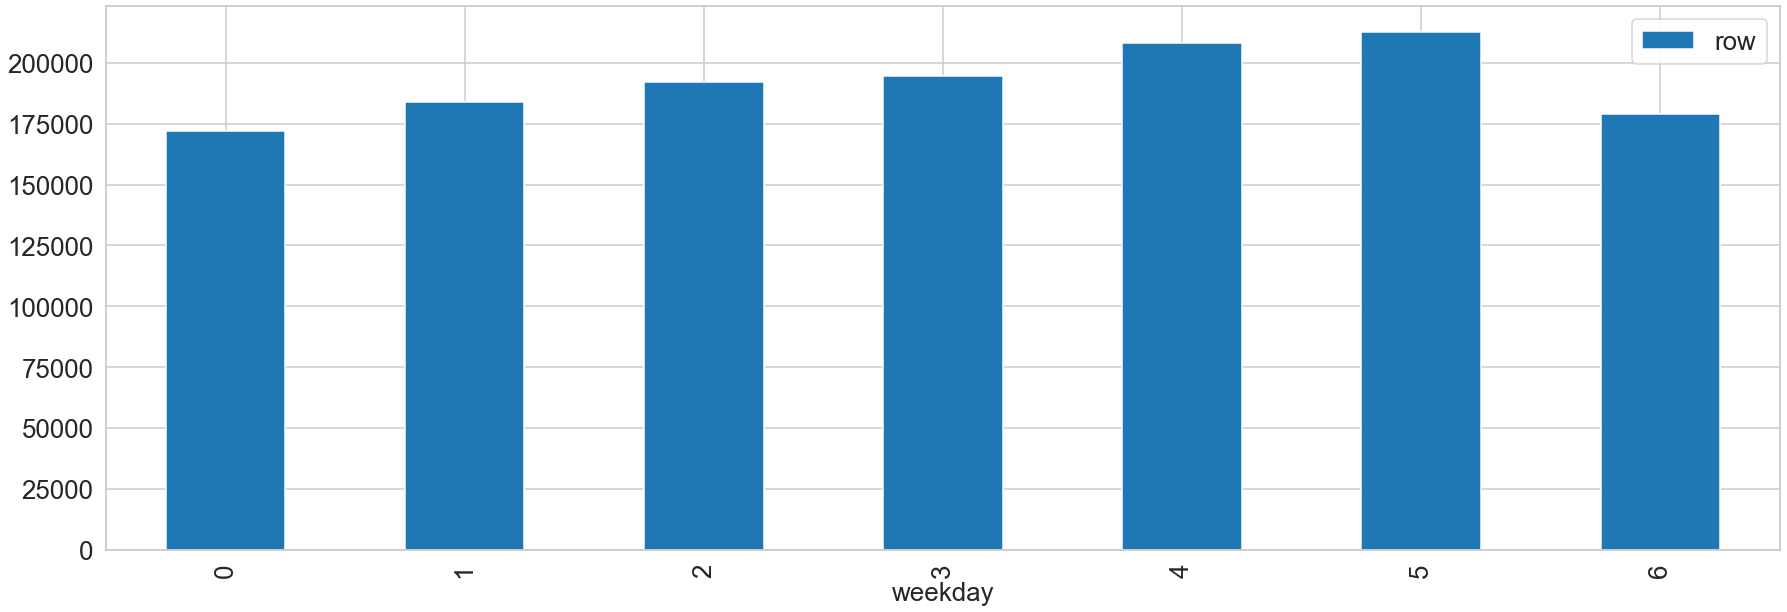

In [23]:
count_weekday.plot.bar()

In [ ]:
# time of the day with more bike usage

In [24]:
df['hoursday'] = df['starttime'].dt.hour

In [25]:
df.hoursday.nunique()

24

In [26]:
count_hour = df.groupby(["hoursday"])["row"].count().to_frame()
count_hour

,row
hoursday,
0,20746
1,16960
2,11071
3,6680
4,4434
5,5378
6,13152
7,40067
8,73374


## usage per hours

<AxesSubplot:xlabel='hoursday'>

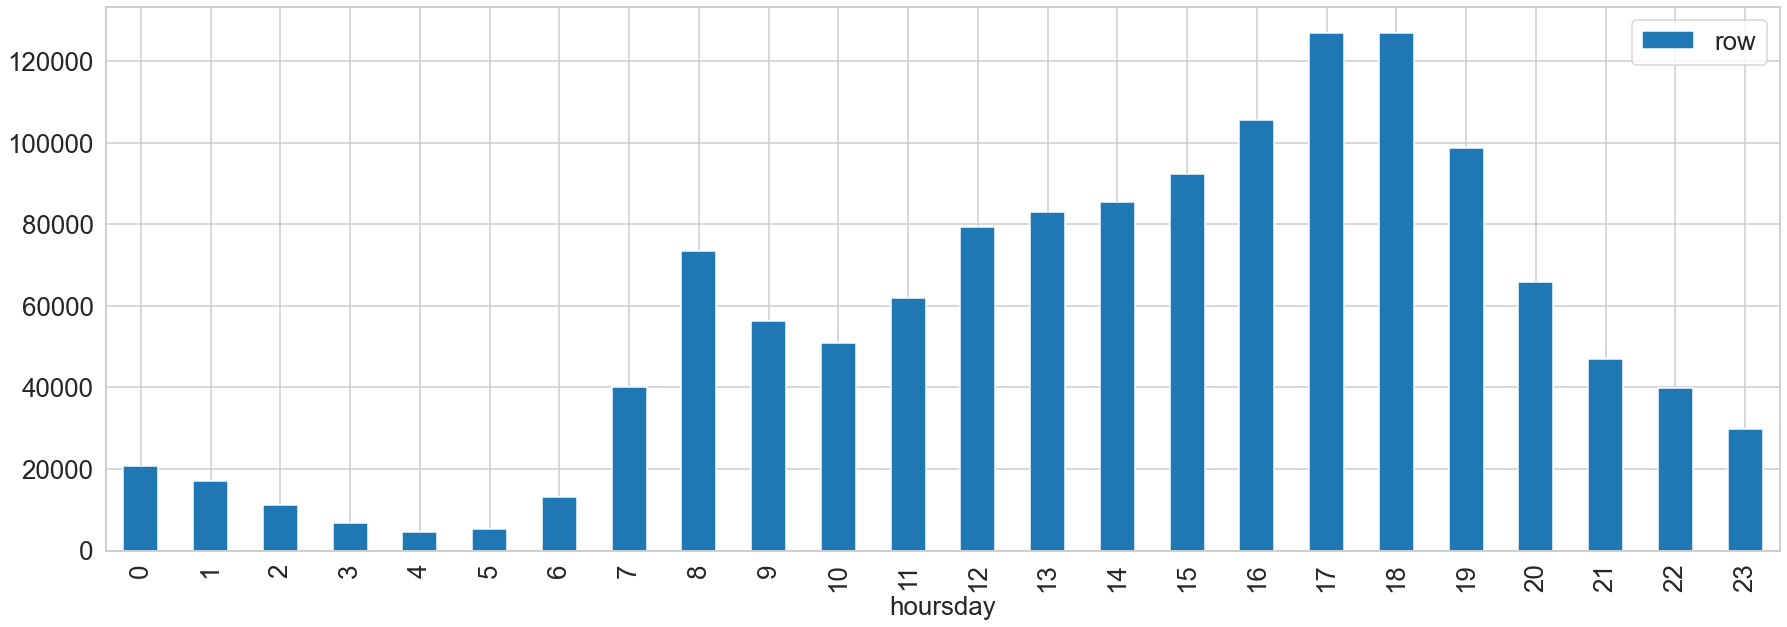

In [27]:
count_hour.plot.bar()

In [28]:
df['monthyear'] = df['starttime'].dt.month 

In [29]:
count_month = df.groupby(["monthyear"])["row"].count().to_frame()
count_month

,row
monthyear,
1,52945
2,70671
3,74263
4,88347
5,115185
6,161243
7,194714
8,168617
9,159283


## usage per month

<AxesSubplot:xlabel='monthyear'>

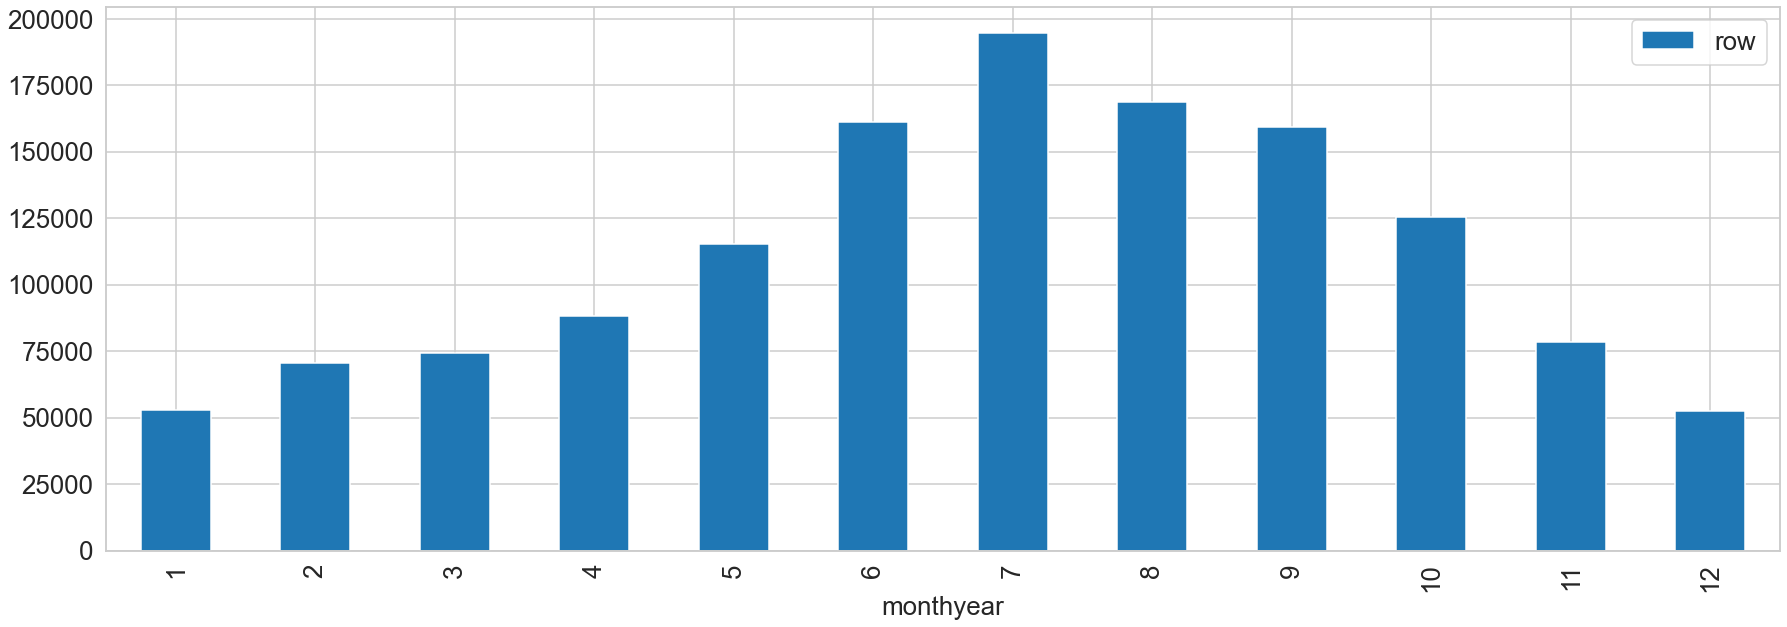

In [30]:
count_month.plot.bar()

In [ ]:
#calculation per season

In [31]:
df.head().T

,0,1,2,3,4
row,1,2,3,4,5
starttime,2021-01-01 01:01:00,2021-01-01 01:19:00,2021-01-01 01:48:00,2021-01-01 01:48:00,2021-01-01 03:26:00
endtime,2021-01-01 01:12:00,2021-01-01 01:59:00,2021-01-01 02:01:00,2021-01-01 02:00:00,2021-01-01 03:39:00
startlat,48.1258,48.12919,48.08189,48.08189,48.11587
startlon,11.64784,11.62583,11.63264,11.63264,11.62543
endlat,48.12948,48.14853,48.07975,48.07975,48.109
endlon,11.62539,11.53142,11.61032,11.61032,11.6524
rental_is_station,1,0,1,1,0
rental_station_name,kreillerstraße,,universitätsstraße_neubiberg,universitätsstraße_neubiberg,
return_is_station,0,0,1,1,0


In [32]:
df['season'] = df['monthyear']
df['season'] = df['season'].map({
    1:1, 2:1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3,9: 4, 10: 4, 11: 4, 12: 1
    })

In [33]:
df.season.nunique()

4

In [34]:
count_season = df.groupby(["season"])["row"].count().to_frame()
count_season

,row
season,
1,176001
2,277795
3,524574
4,362955


## usage per season

<AxesSubplot:xlabel='season'>

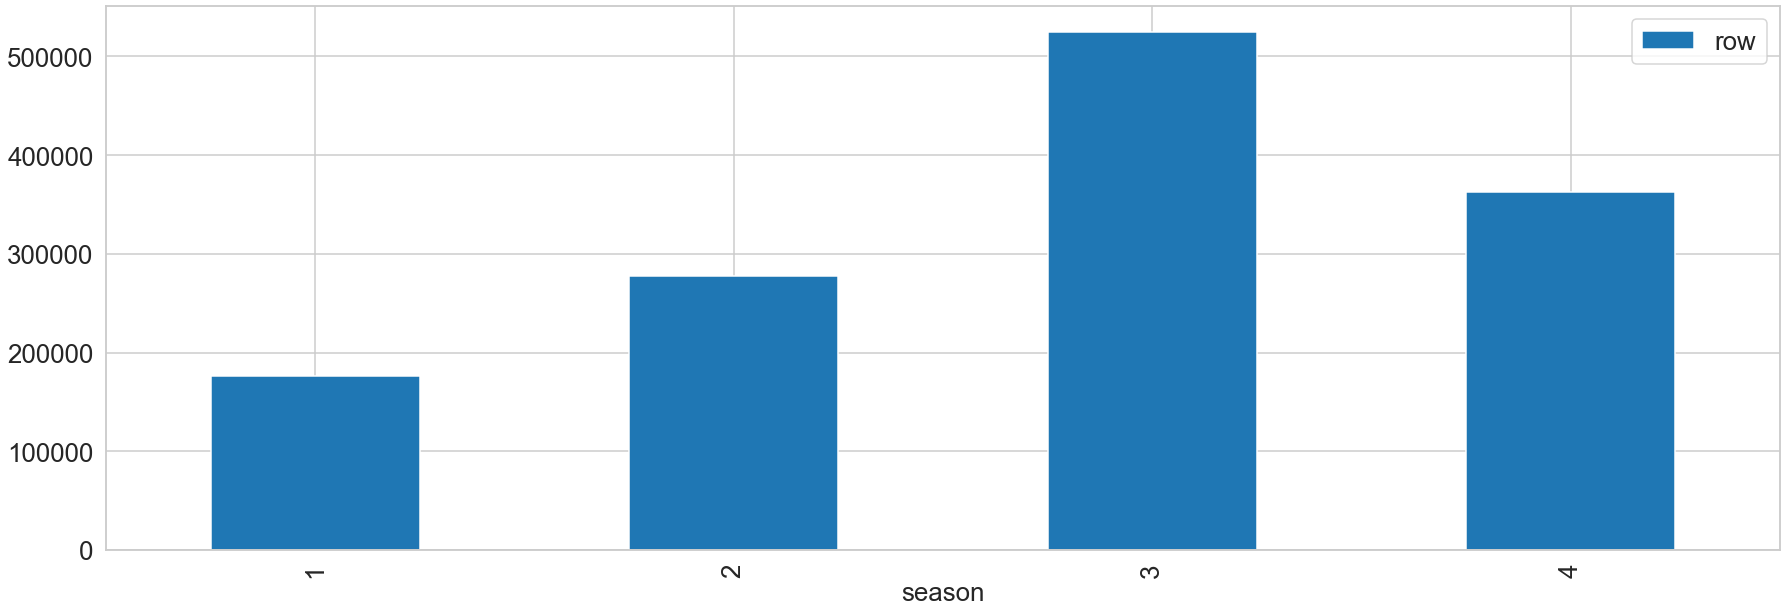

In [35]:
count_season.plot.bar()

In [ ]:
# which station is the one with more starts

In [36]:
more_starts = df['rental_station_name'].value_counts()
more_starts
more_starts.head(10)

                                  957803
münchner_freiheit                   7127
sandstraße                          6927
olympiazentrum                      6443
rotkreuzplatz                       5494
maillingerstraße                    5473
universität                         5081
tum_arcisstraße                     4875
technische_universität_münchen      4760
leonrodplatz                        4673
Name: rental_station_name, dtype: int64

In [ ]:
# which station is the one with more ends

In [37]:
more_ends = df['return_station_name'].value_counts()
more_ends
more_ends.head(10)

                                  1044616
münchner_freiheit                    5966
sandstraße                           5922
olympiazentrum                       5273
rotkreuzplatz                        4940
maillingerstraße                     4375
universität                          4313
pasing                               3911
leonrodplatz                         3796
technische_universität_münchen       3698
Name: return_station_name, dtype: int64

In [ ]:
# visualize in a map the biggest usage sectors

In [38]:

Map = folium.Map(location=[48.13727, 11.57628],
                        zoom_start=13)
for i in range(0, len(df[:500])):
    folium.Marker([df.iloc[i]['startlat'], df.iloc[i]['startlon']], popup=df.iloc[i]['row']).add_to(Map)

Map


In [ ]:
# correlations

In [39]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,row,startlat,startlon,endlat,endlon,rental_is_station,return_is_station,weekday,hoursday,monthyear,season
row,1.000000,0.002888,0.001717,0.002482,0.000867,-0.015313,-0.013329,-0.017966,-0.010983,0.968380,0.687605
startlat,0.002888,1.000000,0.922835,0.046275,0.043035,0.049408,0.010070,-0.001517,-0.003303,-0.003856,-0.002859
startlon,0.001717,0.922835,1.000000,0.046019,0.053647,0.044368,0.010530,-0.000972,-0.002849,-0.004586,-0.003158
endlat,0.002482,0.046275,0.046019,1.000000,0.895829,-0.012388,0.051402,-0.001449,0.003138,-0.005407,-0.001229
endlon,0.000867,0.043035,0.053647,0.895829,1.000000,-0.009765,0.043939,-0.001479,0.001801,-0.006365,-0.001619
rental_is_station,-0.015313,0.049408,0.044368,-0.012388,-0.009765,1.000000,0.238339,-0.017763,-0.033510,-0.008430,-0.027402
return_is_station,-0.013329,0.010070,0.010530,0.051402,0.043939,0.238339,1.000000,-0.021906,-0.019219,-0.009842,-0.013939
weekday,-0.017966,-0.001517,-0.000972,-0.001449,-0.001479,-0.017763,-0.021906,1.000000,-0.040322,-0.012997,0.001544
hoursday,-0.010983,-0.003303,-0.002849,0.003138,0.001801,-0.033510,-0.019219,-0.040322,1.000000,-0.008666,0.009175
monthyear,0.968380,-0.003856,-0.004586,-0.005407,-0.006365,-0.008430,-0.009842,-0.012997,-0.008666,1.000000,0.692807
